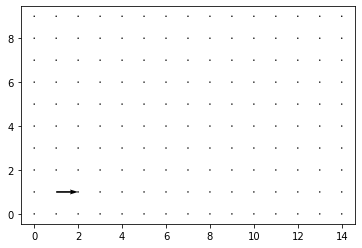

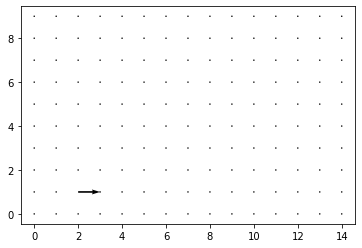

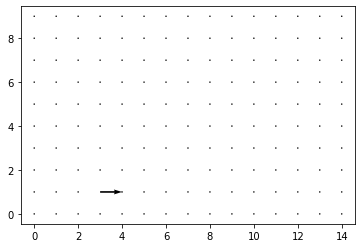

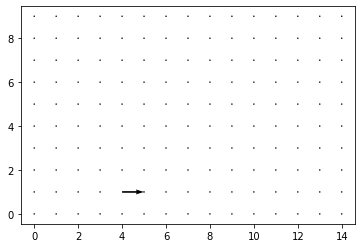

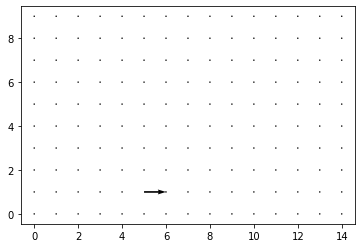

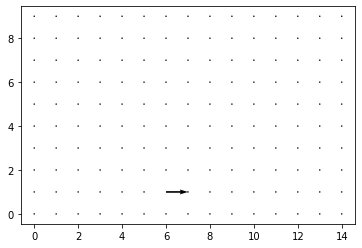

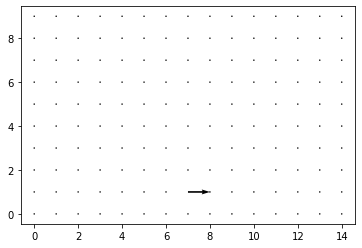

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parameter setup
c_x = np.array([0,1,0,-1,0,1,-1,-1,1])
c_y = np.array([0,0,1,0,-1,1,1,-1,-1])
Nx = 15
Ny = 10
NC = 9 # number of channels
weights = np.array([4/9,1/9,1/36,1/9,1/36,1/9,1/36,1/9,1/36]) # weights for each channel
t = 5

# Probability function setup
grid_size = (Ny,Nx,NC)
f = np.zeros(grid_size)
np.random.seed(10)
f[1,1,1]=1

X,Y = np.meshgrid(range(Nx),range(Ny))

rho = np.sum(f,axis=2)

vel_x = np.divide(np.sum(f*c_x,2),rho, out=np.zeros_like(np.sum(f*c_x,2)), where=rho!=0)
vel_y = np.divide(np.sum(f*c_y,2),rho, out=np.zeros_like(np.sum(f*c_y,2)), where=rho!=0)

timestep=10

def streaming(var):
    var[:,:,1]=np.roll(var[:,:,1],(0,1),axis=(0,1))
    var[:,:,2]=np.roll(var[:,:,2],(1,0),axis=(0,1))
    var[:,:,3]=np.roll(var[:,:,3],(0,-1),axis=(0,1))
    var[:,:,4]=np.roll(var[:,:,4],(-1,0),axis=(0,1))
    var[:,:,5]=np.roll(var[:,:,5],(1,1),axis=(0,1))
    var[:,:,6]=np.roll(var[:,:,6],(-1,1),axis=(0,1))
    var[:,:,7]=np.roll(var[:,:,7],(-1,-1),axis=(0,1))
    var[:,:,8]=np.roll(var[:,:,8],(1,-1),axis=(0,1))
    rho = np.sum(f,axis=2)
    xvel = np.sum(f*c_x,axis=2)
    yvel = np.sum(f*c_y,axis=2)
    return var, xvel, yvel, rho

for i in range(timestep):
    plt.subplots()
    plt.axis('equal')
    plt.quiver(X, Y, vel_x, vel_y, scale=1, units='xy')
    plt.show()
    f,vel_x,vel_y,rho=streaming(f)